<a href="https://colab.research.google.com/github/meiqingli/dssj_summer2022/blob/main/dssj_publishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subreddit Text Analysis: Publishing

In [1]:
import pandas as pd
import spacy

# Loads the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

# When running analysis, skip data preprocessing and exploratary analysis by direcly read preprocessed data after importing packages: https://colab.research.google.com/drive/1v00PLYVMI3Yi5SLVk3THKHHjNtHeeLkH#scrollTo=ZuAcq3sYMr9d&line=1&uniqifier=1

## Data preprocessing (based on module 02 notebook 1)

In [ ]:
# Imports pandas for working with csv data
import pandas as pd 

# Github url with comments data
url_comments = 'https://gist.githubusercontent.com/meiqingli/5d83de4c508a0564359b2dd07c6839b1/raw/a83a44b0a85ac8ccc10f717495ff6a85c2f93878/comments.csv'

# Github url with post data
url_posts = 'https://gist.githubusercontent.com/meiqingli/2d128e1cac170d71b3820c51c6c3766e/raw/5be159378011713f1daaca4d683bb6875d11f61f/submissions.csv'

# Reads the csv comments file from github
df_comments = pd.read_csv(url_comments)

# Reads the csv posts file from github
df_posts = pd.read_csv(url_posts)

In [ ]:
# Tells us about the general shape of the dfs
df_comments.shape

(19538, 11)

In [ ]:
df_posts.shape

(7330, 18)

In [ ]:
# Shows us the first 3 rows in the dfs
df_comments.head(3)

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,publishing,NaN,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,publishing,NaN,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,publishing,NaN,570


In [ ]:
df_posts.head(3)

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,12378361,t3_7db7d,1226647810,0,0,soulajax,Do-It-Yourself Book Press,http://nomediakings.org/doityourself/doityours...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN
1,16624895,t3_9wbun,1256143924,0,0,bookmarked,Blending the Old with the New: Backlist Titles...,http://www.thomasriggs.net/blog/index.php/2009...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN
2,17431958,t3_adml2,1260547827,0,0,bookmarked,A Little Something Extra,http://www.thomasriggs.net/blog/index.php/2009...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN


In [ ]:
# Allows us to see which columns our dfs have
list(df_comments)

['idint',
 'idstr',
 'created',
 'author',
 'parent',
 'submission',
 'body',
 'score',
 'subreddit',
 'distinguish',
 'textlen']

In [ ]:
list(df_posts)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

In [ ]:
# Drops less useful columns from our dfs
# Made new dfs rather than overwriting the originals in case people have different thoughts about what to drop
# 'distinguish' column identifies whether the poster is a moderator, which is potentially interesting, but it's almost always empty so I dropped it
df_comments_short = df_comments.drop(['subreddit', 'distinguish'], axis=1)

In [ ]:
df_posts_short = df_posts.drop(['subreddit', 'url', 'distinguish', 'flair_text', 'flair_css_class', 'augmented_at', 'augmented_count'], axis=1)

In [ ]:
# To visualize the new dfs
df_comments_short.head(3)

,idint,idstr,created,author,parent,submission,body,score,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,570


In [ ]:
df_comments_short.shape

(19538, 9)

In [ ]:
df_posts_short.head(3)

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
0,12378361,t3_7db7d,1226647810,0,0,soulajax,Do-It-Yourself Book Press,NaN,1,0,0
1,16624895,t3_9wbun,1256143924,0,0,bookmarked,Blending the Old with the New: Backlist Titles...,NaN,1,0,0
2,17431958,t3_adml2,1260547827,0,0,bookmarked,A Little Something Extra,NaN,1,0,0


In [ ]:
df_posts_short.shape

(7330, 11)

In [ ]:
# Selects all rows that don't have 'removed' or 'deleted' in certain columns
df_comments_noBlanks = df_comments_short.loc[~df_comments_short['body'].isin(['[removed]', '[deleted]' ]),:]
df_posts_noBlanks = df_posts_short.loc[~df_posts_short['selftext'].isin(['[removed]', '[deleted]' ]),:]

In [ ]:
# Drops rows with null values in 'selftext' column (assuming we want to analyze 'selftext')
# Overwrites the previous dfs because I don't think we'll need access to the intermediate dfs (and I was running out of name ideas)
df_comments_noBlanks = df_comments_noBlanks.dropna(subset=['body'])
df_posts_noBlanks = df_posts_noBlanks.dropna(subset=['selftext'])

In [ ]:
df_comments_noBlanks.head()

,idint,idstr,created,author,parent,submission,body,score,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,570
3,26186762112,t1_c12x6yo,1287619770,inigo_montoya,t1_c12wxol,t3_dtpk6,"Well, an acquisitions editor is a very differe...",1,926
4,26186949360,t1_c1317g0,1287704175,[deleted],t1_c12x6yo,t3_dtpk6,"Yes, ""not panning out"" is precisely where I am...",1,315


In [ ]:
df_comments_noBlanks.shape
# Final number of comments

(19054, 9)

In [ ]:
df_posts_noBlanks.head()

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
7,23221158,t3_dtpk6,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,"I have no industry experience in publishing, b...",2,1007,5
12,25888930,t3_few0y,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,The editor who offered it is fully aware that ...,2,1027,2
17,29705825,t3_hop5t,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,Hey All. How much do short excerpt reprints ty...,2,188,4
62,40519459,t3_o4h0j,1325799133,1,0,hobbitlover,Need a writing program that works in InDesign ...,We use Microsoft Word at our office but it cre...,3,579,3
63,40711806,t3_o8lfi,1326069991,1,0,[deleted],Online ebook cover creator recommendations,"Hey guys,\n\nAny good recommendations on where...",1,75,1


In [ ]:
df_posts_noBlanks.shape
# Final number of posts

(2388, 11)

07/21/22 Questions

In [ ]:
#How frequently are people posting?
Unique_Post=df_posts_noBlanks.author.value_counts()
Unique_Post_Freq=df_posts_noBlanks.author.value_counts(normalize=True) #gives percent on each post. 

Unique_Post[100]
Unique_Post_Freq

[deleted]              0.029313
MaxFreedomMoussa       0.009631
PunkShocker            0.003769
TheRedWhale            0.003350
brisualso              0.003350
                         ...   
germy21                0.000419
annnnnnnnie            0.000419
ElUPTJefe              0.000419
kaybdoodles            0.000419
dimestorepublishing    0.000419
Name: author, Length: 1922, dtype: float64

In [ ]:
unique_users_comments = df_comments_noBlanks['author'].value_counts()
unique_users_comments 

stevehut                1327
JamieIsReading           264
blowinthroughnaptime     240
MaxFreedomMoussa         214
thespacebetweenwalls     190
                        ... 
prettyflyers11             1
whore-moanz                1
Distempa                   1
SortofaWeirdName           1
DaylanDaylan               1
Name: author, Length: 4033, dtype: int64

In [ ]:
#Characters in average post 

Text_Length1=df_posts_noBlanks.textlen.mean()
Text_Length1

Text_Length2=df_comments_noBlanks.textlen.mean()
Text_Length2

332.48163115356357

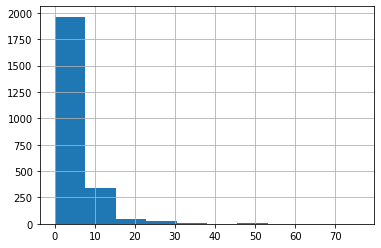

In [ ]:
df_posts_noBlanks.score.hist()

In [ ]:
df_posts_noBlanks.score

7       2
12      2
17      2
62      3
63      1
       ..
7321    3
7322    2
7326    8
7328    0
7329    8
Name: score, Length: 2388, dtype: int64

In [ ]:
df_posts_noBlanks.score

7       2
12      2
17      2
62      3
63      1
       ..
7321    3
7322    2
7326    8
7328    0
7329    8
Name: score, Length: 2388, dtype: int64

## Cleaning text data (based on module 02 notebook 1)

Text data collected in the real world is always going to be variable, which poses a challenge for analysis. But by reducing some of this variation, we can help improve our results. For example, if we are counting instances of the word `"weather"` in text, we might want the strings `"weather"`, `"weather."`, and `"Weather"` to all be counted as instances of the same word. However, in raw text form, these would be treated as separate strings. By performing text cleaning, we can standardize these cases and make our data easier to analyze. Some common preprocessing steps are:

- Removing punctuation
- Removing URLs
- Removing stopwords (non-content words like "a", "the", "is", etc.)
- Lowercasing
- Tokenization (e.g., splitting a sentence into distinct "chunks" or "tokens")
- Stemming, or removing the ends of words (e.g., places -> place)
- Lemmatization, or changing words to 'dictionary form' (e.g., runs, running, run -> run)

Fortunately, we don't need to code every one of these steps. Instead, we will use a package called [spaCy](https://spacy.io/) to do these things. If the text you'd like to process is general-purpose English language text (i.e., not domain-specific, like medical literature), `spaCy` is ready to use out-of-the-box. We will use the [`en_core_web_sm`](https://spacy.io/models/en/#en_core_web_sm) pipeline to cover the steps listed above. 

In [ ]:
df_posts_noBlanks.head(3)

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
7,23221158,t3_dtpk6,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,"I have no industry experience in publishing, b...",2,1007,5
12,25888930,t3_few0y,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,The editor who offered it is fully aware that ...,2,1027,2
17,29705825,t3_hop5t,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,Hey All. How much do short excerpt reprints ty...,2,188,4


In [ ]:
# Imports spaCy
import spacy

# Loads the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

# Parses the first r/publishing post
parsed_post = nlp(df_posts_noBlanks.selftext.iloc[0])
print(parsed_post)

I have no industry experience in publishing, but would very much like to enter the field - specifically, editing. It seems as if the usual catch-22 holds true: to get the job, you need experience; to get experience, you need a job. Finding entry-level work is proving very difficult. I live in Baltimore, MD and I feel that I've exhausted the obvious avenues, sending my resume and cover letter to every magazine, newspaper, publishing house, etc., that I can locate. 

I am not opposed to internships, of course, but as I am not a college student, I tend to be excluded from consideration. Additionally, I have to support myself and so work-for-pay, in an obvious sense, takes priority.

I realize that there are only 10 readers in this subreddit, so this really is a shot in the dark, but I could use some advice from persons familiar with the industry. I've considered, as well, sending out a few emails to editors whose blogs I read, asking them for similar guidance. Would this be perceived as b

In [ ]:
# Print each sentence in the parsed post
for idx, sentence in enumerate(parsed_post.sents):
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('')

Sentence 1
I have no industry experience in publishing, but would very much like to enter the field - specifically, editing.

Sentence 2
It seems as if the usual catch-22 holds true: to get the job, you need experience; to get experience, you need a job.

Sentence 3
Finding entry-level work is proving very difficult.

Sentence 4
I live in Baltimore, MD and I feel that I've exhausted the obvious avenues, sending my resume and cover letter to every magazine, newspaper, publishing house, etc., that I can locate.

Sentence 5




Sentence 6
I am not opposed to internships, of course, but as I am not a college student, I tend to be excluded from consideration.

Sentence 7
Additionally, I have to support myself and so work-for-pay, in an obvious sense, takes priority.



Sentence 8
I realize that there are only 10 readers in this subreddit, so this really is a shot in the dark, but I could use some advice from persons familiar with the industry.

Sentence 9
I've considered, as well, sending o

In [ ]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,I,PRON,I,True,False
1,have,VERB,have,True,False
2,no,DET,no,True,False
3,industry,NOUN,industry,False,False
4,experience,NOUN,experience,False,False
5,in,ADP,in,True,False
6,publishing,NOUN,publishing,False,False
7,",",PUNCT,",",False,True
8,but,CCONJ,but,True,False
9,would,AUX,would,True,False


In [ ]:
# preprocess the example sentence
test = nlp("That’s actually not true")
tokens = []
# For each token in the processed object
for token in test:
    # Check if the token is punctuation
    if not token.is_punct:
        # Append the lower-case lemma to the list
        tokens.append(token.lemma_.lower())
print(tokens)

['that', '’s', 'actually', 'not', 'true']


In [ ]:
test = nlp("I'm you’re he's he's That's that’s he’s he's father's father’s")
tokens = [token.lemma_.lower() for token in test if not token.is_punct]
for i, tokens in enumerate(tokens):
    print(i, tokens)

0 i
1 be
2 you
3 ’re
4 he
5 be
6 he
7 be
8 that
9 be
10 that
11 ’s
12 he
13 ’
14 he
15 's
16 father
17 's
18 father
19 ’s


In [ ]:
test = nlp("I'm you’re he's he's That's that’s he’s he's father's father’s")
tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
          else token.lower_
          for token in test if not token.is_punct and not token.is_digit]
leftover = ["'s",  "’s", "’"]
tokens_c = [token for token in tokens if not token in leftover]

for i, t in enumerate(tokens_c):
    print(i, t)

0 i
1 be
2 you
3 ’re
4 he
5 be
6 he
7 be
8 that
9 be
10 that
11 he
12 he
13 father
14 father


Preprocessing all data

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess_posts(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to the posts dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

# created a different preprocessing function for the comments df because the relevant column name is different
def preprocess_comments(df, text_col='body', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to the comments dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [ ]:
# creates a list of lists of lemmas in each post
lemmas_posts = [line for line in preprocess_posts(df_posts_noBlanks)]

In [ ]:
len(lemmas_posts)
# confirms that there's a lemma list for each post

2388

In [ ]:
# shows the list of lemmas in the first post
lemmas_posts[0]

['industry',
 'experience',
 'publishing',
 'like',
 'enter',
 'field',
 'specifically',
 'editing',
 'usual',
 'catch-22',
 'hold',
 'true',
 'job',
 'need',
 'experience',
 'experience',
 'need',
 'job',
 'find',
 'entry',
 'level',
 'work',
 'prove',
 'difficult',
 'live',
 'baltimore',
 'md',
 'feel',
 'exhaust',
 'obvious',
 'avenue',
 'send',
 'resume',
 'cover',
 'letter',
 'magazine',
 'newspaper',
 'publishing',
 'house',
 'etc',
 'locate',
 'oppose',
 'internship',
 'course',
 'college',
 'student',
 'tend',
 'exclude',
 'consideration',
 'additionally',
 'support',
 'work',
 'pay',
 'obvious',
 'sense',
 'priority',
 'realize',
 'reader',
 'subreddit',
 'shot',
 'dark',
 'use',
 'advice',
 'person',
 'familiar',
 'industry',
 'consider',
 'send',
 'email',
 'editor',
 'blog',
 'read',
 'ask',
 'similar',
 'guidance',
 'perceive',
 'brazen']

In [ ]:
lemmas_posts[19]

['write',
 'poem',
 'book',
 'freshman',
 'year',
 'high',
 'school',
 'second',
 'year',
 'college',
 'dream',
 'publish',
 'poem',
 'know',
 'poem',
 'let',
 'book',
 'money',
 'order',
 'book',
 'copy',
 'think',
 'possible',
 'post',
 'online',
 'website',
 'recognize',
 'work',
 'anybody',
 'know',
 'help',
 'greatly',
 'appreciate']

In [ ]:
# creates a list of lists of lemmas in each comment
lemmas_comments = [line for line in preprocess_comments(df_comments_noBlanks)]

In [ ]:
# shows the list of lemmas in the first comment
lemmas_comments[0]

['great', 'tip', 'start', 'market', 'book', 'online', 'publish']

In [ ]:
# flattens the list of lists into one big list to facilitate counting lemma frequency
flat_lemmas_posts = [item for sublist in lemmas_posts for item in sublist]
flat_lemmas_posts[:30]

['industry',
 'experience',
 'publishing',
 'like',
 'enter',
 'field',
 'specifically',
 'editing',
 'usual',
 'catch-22',
 'hold',
 'true',
 'job',
 'need',
 'experience',
 'experience',
 'need',
 'job',
 'find',
 'entry',
 'level',
 'work',
 'prove',
 'difficult',
 'live',
 'baltimore',
 'md',
 'feel',
 'exhaust',
 'obvious']

In [ ]:
# creates a df to see which lemmas are the most frequent
from collections import Counter
posts_count = Counter(flat_lemmas_posts)

lemma_freq_df_posts = pd.DataFrame.from_dict(posts_count, orient='index').reset_index()
lemma_freq_df_posts = lemma_freq_df_posts.rename(columns={'index':'lemma', 0:'count'})
lemma_freq_df_posts.sort_values('count', ascending=False)[:30]

,lemma,count
201,book,3137
187,publish,1797
2,publishing,1451
17,work,1394
3,like,1283
120,know,1132
188,want,1063
290,publisher,1059
174,write,971
77,look,837


In [ ]:
lemma_freq_df_posts

,lemma,count
0,industry,285
1,experience,459
2,publishing,1451
3,like,1283
4,enter,40
...,...,...
12145,meit,1
12146,contractthey,1
12147,refusal,1
12148,charactersit,1


In [ ]:
# replicates this same process for the comments
flat_lemmas_comments = [item for sublist in lemmas_comments for item in sublist]
flat_lemmas_comments[:30]

['great',
 'tip',
 'start',
 'market',
 'book',
 'online',
 'publish',
 'think',
 'extremely',
 'hard',
 'find',
 'salaried',
 'position',
 'editor',
 'copy',
 'editor',
 'acquisition',
 'specify',
 'good',
 'economy',
 'industry',
 'shrink',
 'position',
 'turn',
 'rapidly',
 'tend',
 'mobility',
 'publishing',
 'organization',
 'gopher']

In [ ]:
comments_count = Counter(flat_lemmas_comments)

lemma_freq_df_comments = pd.DataFrame.from_dict(comments_count, orient='index').reset_index()
lemma_freq_df_comments = lemma_freq_df_comments.rename(columns={'index':'lemma', 0:'count'})
lemma_freq_df_comments.sort_values('count', ascending=False)[:30]

,lemma,count
4,book,10179
72,work,5764
322,publisher,5160
6,publish,4782
25,publishing,4583
17,good,4262
161,like,4043
324,want,3661
170,author,3406
940,agent,3219


Forming bigrams and trigrams

In [ ]:
from gensim.models.phrases import Phrases, Phraser

# Create bigram and trigram models for posts
bigram_posts = Phrases(lemmas_posts, min_count=10, threshold=100)
trigram_posts = Phrases(bigram_posts[lemmas_posts], min_count=10, threshold=50)  
bigram_phraser_posts = Phraser(bigram_posts)
trigram_phraser_posts = Phraser(trigram_posts)

# Form trigrams
trigrams_posts = [trigram_phraser_posts[bigram_phraser_posts[doc]] for doc in lemmas_posts]

# Create bigram and trigram models for comments
bigram_comments = Phrases(lemmas_comments, min_count=10, threshold=100)
trigram_comments = Phrases(bigram_comments[lemmas_comments], min_count=10, threshold=50)  
bigram_phraser_comments = Phraser(bigram_comments)
trigram_phraser_comments = Phraser(trigram_comments)

# Form trigrams
trigrams_comments = [trigram_phraser_comments[bigram_phraser_comments[doc]] for doc in lemmas_comments]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# joins each into a string
trigrams_joined_posts = [' '.join(trigram) for trigram in trigrams_posts]
trigrams_joined_posts[0]

'industry experience publishing like enter field specifically editing usual catch-22 hold true job need experience experience need job find entry_level work prove difficult live baltimore md feel exhaust obvious avenue send resume cover_letter magazine newspaper publishing house etc locate oppose internship course college student tend exclude consideration additionally support work pay obvious sense priority realize reader subreddit shot dark use advice person familiar industry consider send email editor blog read ask similar guidance perceive brazen'

In [ ]:
# joins each into a string
trigrams_joined_comments = [' '.join(trigram) for trigram in trigrams_comments]
trigrams_joined_comments[0]

'great tip start market book online publish'

In [ ]:
trigram_phraser_posts.phrasegrams.keys()

dict_keys([(b'entry', b'level'), (b'cover', b'letter'), (b'hey', b'guy'), (b'year', b'ago'), (b'short', b'story'), (b'query', b'letter'), (b'greatly', b'appreciate'), (b'greatly', b'appreciate_thank'), (b'non', b'fiction'), (b'high', b'school'), (b'thank', b'advance'), (b'high', b'quality'), (b'help_greatly', b'appreciate'), (b'entry_level', b'position'), (b'foot', b'door'), (b'editorial', b'assistant'), (b'month', b'ago'), (b'small', b'press'), (b'graphic', b'designer'), (b'literary', b'agent'), (b'creative', b'writing'), (b'google', b'play'), (b'social', b'medium'), (b'print', b'demand'), (b'graphic', b'design'), (b'young', b'adult'), (b'red', b'flag'), (b'vanity', b'press'), (b'science', b'fiction'), (b'grad', b'school'), (b'non', b'fiction_book'), (b'barnes', b'noble'), (b'coffee', b'table'), (b'word', b'count'), (b'pro', b'con'), (b'target', b'audience'), (b'advice_greatly', b'appreciate'), (b'adobe', b'indesign'), (b'united', b'states'), (b'shed', b'light'), (b'beta', b'reader'),

In [ ]:
trigram_phraser_comments.phrasegrams.keys()

dict_keys([(b'entry', b'level'), (b'entry', b'level_position'), (b'entry_level', b'position'), (b'uphill', b'battle'), (b'copyright', b'holder'), (b'college', b'student'), (b'university', b'press'), (b'historical', b'fiction'), (b'short', b'story'), (b'good', b'luck'), (b'answer', b'question'), (b'pro', b'con'), (b'small', b'press'), (b'literary', b'agency'), (b'graphic', b'design'), (b'high', b'school'), (b'graphic', b'designer'), (b'intellectual', b'property'), (b'job', b'posting'), (b'print', b'demand'), (b'epub', b'mobi'), (b'foot', b'door'), (b'editorial', b'assistant'), (b'random', b'house'), (b'high', b'quality'), (b'literary', b'magazine'), (b'social', b'medium'), (b'social_medium', b'presence'), (b'word', b'mouth'), (b'social', b'medium_account'), (b'marketing', b'publicity'), (b'entry', b'level_job'), (b'unpaid', b'internship'), (b'distribution', b'channel'), (b'/r', b'selfpublish'), (b'stephen', b'king'), (b'rejection', b'letter'), (b'barnes', b'noble'), (b'career', b'path')

In [ ]:
# Look at trigrams for posts
[trigram for trigram in list(trigram_phraser_posts.phrasegrams.keys()) if trigram.count('_') == 2]

[]

In [ ]:
# Look at trigrams for comments
[trigram for trigram in list(trigram_phraser_comments.phrasegrams.keys()) if trigram.count('_') == 2]

[]

In [ ]:
# adds lemmas column to submissions df (with option to make csv)
df_posts_noBlanks.insert(loc=7, column='lemmas', value=trigrams_joined_posts)
df_posts_noBlanks = df_posts_noBlanks[~df_posts_noBlanks['lemmas'].isin([''])]
# df_posts_noBlanks.to_csv('submissions_lemmas.csv', index=False)

# adds lemmas column to comments df (with option to make csv)
df_comments_noBlanks.insert(loc=7, column='lemmas', value=trigrams_joined_comments)
df_comments_noBlanks = df_comments_noBlanks[~df_comments_noBlanks['lemmas'].isin([''])]
# df_comments_noBlanks.to_csv('comments_lemmas.csv', index=False)

In [ ]:
df_posts_noBlanks.head(3)

,idint,idstr,created,self,nsfw,author,title,lemmas,selftext,score,textlen,num_comments
7,23221158,t3_dtpk6,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,industry experience publishing like enter fiel...,"I have no industry experience in publishing, b...",2,1007,5
12,25888930,t3_few0y,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,editor offer fully aware come directly college...,The editor who offered it is fully aware that ...,2,1027,2
17,29705825,t3_hop5t,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,hey short excerpt reprint typically cost profi...,Hey All. How much do short excerpt reprints ty...,2,188,4


In [ ]:
df_comments_noBlanks.head(3)

,idint,idstr,created,author,parent,submission,body,lemmas,score,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,great tip start market book online publish,1,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,think extremely hard find salaried position ed...,1,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",honestly think happy edit acquisition copy rea...,1,570


In [ ]:
# save preprosessed dfs to .csvs
# df_posts_noBlanks.to_csv("df_posts_noBlanks.csv")
# df_comments_noBlanks.to_csv("df_comments_noBlanks.csv")

## Skip Preprocessing - Load Preprocessed Dataframes Here

In [2]:
# Github url with comments data
url_comments_processed = 'https://gist.githubusercontent.com/meiqingli/704f7aee9293334a5ce9ee5217ed8dc2/raw/325bff375b0413d8462fc311b33fa894194cb96c/df_comments_noBlanks.csv'

# Github url with post data
url_posts_processed = 'https://gist.githubusercontent.com/meiqingli/e789a6c16b63bba3da4f4fb4dadb299f/raw/c78b4b74c18656f6e25e01f1245289dfbac7bf15/df_posts_noBlanks.csv'

# Reads the csv comments file from github
df_comments_noBlanks = pd.read_csv(url_comments_processed)

# Reads the csv posts file from github
df_posts_noBlanks = pd.read_csv(url_posts_processed)

## Exploring Texts with `pandas` and `nltk` (based on Model 2 notebook 02)

In [3]:
# Run if nltk is not installed
# !pip install nltk

In [7]:
# Sort dataframe by highest scores
df_posts_noBlanks.sort_values(by=['score'], ascending=True).head(3)
#highest is 76

,Unnamed: 0,idint,idstr,created,self,nsfw,author,title,lemmas,selftext,score,textlen,num_comments
404,2319,233972106,t3_3vau16,1449162677,1,0,gloopmagazine,KICKSTARTER FOR A ONE-OF-A-KIND TEEN MAGAZINE!...,short gloop offer curate content young people ...,"In short, Gloop! offers curated content for yo...",0,529,0
1510,5837,1047462900,t3_hbmrjo,1592513546,1,0,brisualso,[Critique Request] How to Spot a Good Synopsis?,hello!i write synopsis short_story difficult d...,Hello!\n\nI will say that writing a synopsis f...,0,701,0
1528,5873,1054845205,t3_hg0zrp,1593145694,1,0,CheekClappR69,How should I write a light novel in English?,joke post remove character thing like charlie ...,I'm serious no joke. I already got a post remo...,0,234,2


Value Counts

In [4]:
df_posts_noBlanks['self'].value_counts()

1    2387
Name: self, dtype: int64

In [5]:
df_posts_noBlanks['nsfw'].value_counts()

0    2385
1       2
Name: nsfw, dtype: int64

In [6]:
df_posts_noBlanks['score'].value_counts()

2     380
1     344
3     335
4     224
0     217
5     203
6     137
7     122
8      90
9      78
10     46
11     33
12     32
13     26
14     23
16     18
15     10
17      8
27      7
20      6
28      4
34      3
35      3
25      3
19      3
18      3
21      3
30      3
24      2
22      2
29      2
36      2
23      2
64      1
76      1
32      1
53      1
48      1
45      1
51      1
54      1
37      1
59      1
26      1
40      1
65      1
Name: score, dtype: int64

In [7]:
df_comments_noBlanks['parent'].value_counts()

t3_gg32c9     21
t3_vcqtg      19
t3_iddmzk     19
t3_hvy1h5     19
t3_g9cf65     19
              ..
t1_fh9qwuu     1
t1_fhak2yk     1
t1_fhahcw2     1
t1_fh9s7vr     1
t3_ohoqpl      1
Name: parent, Length: 11891, dtype: int64

In [8]:
df_comments_noBlanks['submission'].value_counts()

t3_mwb5yh    77
t3_lj7v93    52
t3_gg32c9    52
t3_lgvahm    50
t3_hfi3t5    49
             ..
t3_8nozwk     1
t3_8oel32     1
t3_8szjgc     1
t3_8zmlaw     1
t3_ohoqpl     1
Name: submission, Length: 3060, dtype: int64

type-token Ratio (TTR)

In [9]:
def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [10]:
for text in df_posts_noBlanks['lemmas'][100:105]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 year save money startup cost want start publishing house advice break market know basically business publishing look resource learn worth business evening class
TTR: 0.9130434782608695 

Text:
 tell lie finish novel want freedom find good route publish possible young spiral bit piss naiveté mean need buy time knock good story quick like capable rock certain mental uniqueness prevent hold job wonderful world typically habit ask advice humbly present /r publishing assistance self publishing publish short fiction head water head water $ month live hovel write good 40,000 word story 10,000 word short_story day live portland relevance answer merit appreciate advice recommendation dialogue etc thank time hopefully good come
TTR: 0.8518518518518519 

Text:
 lot publish love discuss like hear people actually publish publishing list related subreddit right panel r selfpublish r selfpublishe interested self publishing print_demand etc question work professional distributor
TTR: 0.89285714

In [11]:
print(type(df_posts_noBlanks['lemmas']))

<class 'pandas.core.series.Series'>


Processing and Analyzing Language with `Text()`

In [12]:
tokens = []
for idx, row in enumerate(df_posts_noBlanks['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [13]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

aita_tokens = Text(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# help(Text)

Help on class Text in module nltk.text:

class Text(builtins.object)
 |  Text(tokens, name=None)
 |  
 |  A wrapper around a sequence of simple (string) tokens, which is
 |  intended to support initial exploration of texts (via the
 |  interactive console).  Its methods perform a variety of analyses
 |  on the text's contexts (e.g., counting, concordancing, collocation
 |  discovery), and display the results.  If you wish to write a
 |  program which makes use of these analyses, then you should bypass
 |  the ``Text`` class, and use the appropriate analysis function or
 |  class directly instead.
 |  
 |  A ``Text`` is typically initialized from a given document or
 |  corpus.  E.g.:
 |  
 |  >>> import nltk.corpus
 |  >>> from nltk.text import Text
 |  >>> moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, tokens, name=None)
 |      Create a Text object.
 |      
 |      :param tokens:

Concordances

In [15]:

aita_tokens.concordance('need', width=75)

Displaying 25 of 546 matches:
iting usual catch-22 hold true job need experience experience need job fin
rue job need experience experience need job find entry_level work prove di
ost profit photo try profit report need short excerpt thank use microsoft 
good special character cause issue need able import word file website use 
ication ambitious thing look thing need work start thank reading edit than
guess question advice protect work need agent know good reputable publishe
 business fresh high_school wonder need protect business world register tm
retty impulsive life decision feel need dream work major publishing house 
 letter press relatively short run need register tax d po box pruchase isb
io book id like step prepare print need budget cost printer shipping marke
rinting book supplier photographic need print decently decent paper aware 
ssible canada know publish uk hear need agent true good way like lot poste
lishing digital sure viable option need agent order able apply lot big

Collocations

In [16]:
aita_tokens.collocation_list()

[('self', 'publish'),
 ('publishing', 'house'),
 ('self', 'publishing'),
 ('feel', 'like'),
 ('publishing', 'company'),
 ('child', 'book'),
 ('publishing', 'industry'),
 ('let', 'know'),
 ('publish', 'book'),
 ('traditional', 'publishing'),
 ('year', 'old'),
 ('good', 'way'),
 ('advice', 'appreciate'),
 ('write', 'book'),
 ('good', 'place'),
 ('brick', 'mortar'),
 ('query', 'agent'),
 ('literary', 'magazine'),
 ('dungeons', 'dragons'),
 ('week', 'ago')]

Similar Words

In [17]:
aita_tokens.similar('agent')

know work publisher book like publish online author good self new look
year big traditional publishing find ask come try


Common Context

In [18]:
aita_tokens.common_contexts(['novel', 'fiction'])

second_novel short_publish publish_poetry ya_story


Incorporating Time

In [19]:
datetimes = pd.to_datetime(df_posts_noBlanks['created'], unit='s')

In [20]:
df_posts_noBlanks.insert(loc=3, column='created_datetime', value=datetimes)
df_posts_noBlanks.head(3)

,Unnamed: 0,idint,idstr,created_datetime,created,self,nsfw,author,title,lemmas,selftext,score,textlen,num_comments
0,7,23221158,t3_dtpk6,2010-10-20 06:06:43,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,industry experience publishing like enter fiel...,"I have no industry experience in publishing, b...",2,1007,5
1,12,25888930,t3_few0y,2011-02-04 01:18:13,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,editor offer fully aware come directly college...,The editor who offered it is fully aware that ...,2,1027,2
2,17,29705825,t3_hop5t,2011-06-01 01:36:18,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,hey short excerpt reprint typically cost profi...,Hey All. How much do short excerpt reprints ty...,2,188,4


In [21]:
df_2021 = df_posts_noBlanks.loc[pd.DatetimeIndex(df_posts_noBlanks['created_datetime']).year == 2021, :]
len(df_2021)

357

In [22]:
df_2021.head(3)

,Unnamed: 0,idint,idstr,created_datetime,created,self,nsfw,author,title,lemmas,selftext,score,textlen,num_comments
2030,6693,1250620493,t3_kol4y5,2021-01-01 22:57:12,1609541832,1,0,7777777H,Is publisher likely to remove 'interactive' pa...,newbie roughly half kid picture book illustrat...,Newbie here. I'm roughly half done with a kids...,2,962,5
2031,6694,1250719153,t3_kon92p,2021-01-02 00:55:03,1609548903,1,0,jamalbarbari,Want to Traditionally Publish A Short Story An...,hello lovely writers publishers!its title deta...,Hello Lovely Writers/Publishers!\n\nIts all in...,4,1272,13
2032,6695,1250921426,t3_korl5e,2021-01-02 05:24:04,1609565044,1,0,simianeditions,How to allow a writer to do Amazon Ads when I'...,small_press prepare design edit distribute boo...,"I have a small press. I prepare, design, edit,...",8,700,18


In [23]:
months_array = pd.DatetimeIndex(df_2021['created_datetime']).month_name()
months_array

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='created_datetime', length=357)

# Module 2 Notebook 3: Term Frequency-Inverse Document Frequency (TF-IDF)



In [24]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  'Find an agent.',
  'I work at a publishing house in their marketing department.',
  'Yes, send your stuff to agents (no matter what you have done) and they can help you. ']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# Use this if your scikit-learn is older
# pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,agent,agents,an,and,at,can,department,done,find,have,...,send,stuff,their,they,to,what,work,yes,you,your
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,1,0,1,2,1


# Module 2 Notebook 3: Term Frequency-Inverse Document Frequency (TF-IDF) 
*JP


TF-IDF shows which words are most unique/relevant to the sample. High TF-IDF scores indicate high uniqueness. Lower scores may be that the words appear less frequently or that they are not very unique (don't provide much new information about the sample). Standard jargon like "literary" or "publish" may be on par for r/publishing.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [ 'Find an agent.', 'I work at a publishing house in their marketing department.', 'Yes, send your stuff to agents (no matter what you have done) and they can help you. ']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,agent,agents,an,and,at,can,department,done,find,have,...,send,stuff,their,they,to,what,work,yes,you,your
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,1,0,1,2,1


In [26]:
X.shape

(3, 27)

In [27]:
document1="There are several authors who have publicly demeaned self publishing.  It's a shame.  Honestly I think the best way to judge a perception is to gauge success.  We are all aware that there is just as much potential, which some authors have been able to capitalize, in self publishing as there is in the traditional route."
document2="All of the big six houses have summer internship programs--if you go to each of their websites, there's usually a link at the bottom of the page for careers and you should find internship info there. Have you considered literary agencies too? There are hundreds in Manhattan and they're always looking for interns. I work at a literary agency and started off as an intern. There isn't as much editing work at first but it's really invaluable experience. Good luck! """  
document3="Rarely do those nonstandard things cost the author money upfront, though. To me, there's a big difference between an agent wanting a manuscript single spaced when submitted vs. say one saying you need to pay for professional editing before submitting. When money comes into play (like paying for registering a copyright before you should realistically need one) red (or at least orange) flags go up."
test_list=[document1, document2, document3]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.85, stop_words='english')
word_count_vector = cv.fit_transform(test_list)
pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names_out())
# Use this if your scikit-learn is older
# pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())

,able,agencies,agency,agent,author,authors,aware,best,big,capitalize,...,things,think,traditional,upfront,usually,vs,wanting,way,websites,work
0,1,0,0,0,0,2,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,2
2,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0


Using TfidfTransformer


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer() 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [30]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(), columns=["idf_weights"]) 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
editing,1.287682
big,1.287682
able,1.693147
registering,1.693147
red,1.693147
...,...
info,1.693147
hundreds,1.693147
houses,1.693147
isn,1.693147


In [31]:
tf_idf_vector = tfidf_transformer.transform(word_count_vector)

In [32]:
feature_names = cv.get_feature_names_out() 

In [33]:
df = pd.DataFrame(tf_idf_vector[2].T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"], ascending=False)

,tfidf
money,0.323776
need,0.323776
realistically,0.161888
spaced,0.161888
single,0.161888
...,...
looking,0.000000
luck,0.000000
manhattan,0.000000
agencies,0.000000


The most unique "relevant" words to these three given documents are: "money" and "need." Words like "work," "agencies," "manhattan" are at the bottom. 

We will apply this method to the rest of the corpus later.


In [ ]:
# TFIDF Analysis for the entire dataset


### Looking at concordance & collocation of lemmas with TFIDF > 0.1 

In [ ]:
#Looking at TFIDF scores of words with TFIDF> 0.1

df_top = df.loc[df['tfidf'] >= 0.1, :]
Top_TFIDF=df_top.sort_values(by=["tfidf"], ascending=False)
Top_TFIDF = Top_TFIDF.rename(columns={0:'lemma',1:'TFIDF'}) #not working 
Top_TFIDF



,tfidf
need,0.323776
money,0.323776
agent,0.161888
saying,0.161888
realistically,0.161888
red,0.161888
registering,0.161888
say,0.161888
single,0.161888
professional,0.161888


In [ ]:
Top_TFIDF[['tfidf']].head()

,tfidf
need,0.323776
money,0.323776
agent,0.161888
saying,0.161888
realistically,0.161888


In [ ]:
len(df_top)

#33 words with TFIDF >0.1 (we can change this value: it was just seeing the drop between the highest two (0.32) and other scores (0.16))


33

In [ ]:
#looking at concordance of lemmas with TFIDF >0.1
aita_tokens.concordance('need', width=75)

Displaying 25 of 546 matches:
iting usual catch-22 hold true job need experience experience need job fin
rue job need experience experience need job find entry_level work prove di
ost profit photo try profit report need short excerpt thank use microsoft 
good special character cause issue need able import word file website use 
ication ambitious thing look thing need work start thank reading edit than
guess question advice protect work need agent know good reputable publishe
 business fresh high_school wonder need protect business world register tm
retty impulsive life decision feel need dream work major publishing house 
 letter press relatively short run need register tax d po box pruchase isb
io book id like step prepare print need budget cost printer shipping marke
rinting book supplier photographic need print decently decent paper aware 
ssible canada know publish uk hear need agent true good way like lot poste
lishing digital sure viable option need agent order able apply lot big

In [ ]:
for i, tokens in enumerate(tokens):
    print(i, tokens)

Streaming output truncated to the last 5000 lines.
118341 company
118342 training
118343 lesson
118344 church
118345 group
118346 actual
118347 professional
118348 look
118349 book
118350 find
118351 store
118352 dream
118353 look
118354 book
118355 like
118356 ones](https://www.goldencoil.com/
118357 golden
118358 coil
118359 complete
118360 like
118361 sell
118362 directly
118363 site
118364 etsy
118365 publisher
118366 high_quality
118367 printer
118368 recommendations?thank
118369 greeting
118370 folki
118371 traditional
118372 editor
118373 proofreader
118374 mean
118375 work
118376 book
118377 publishing
118378 industry
118379 correct
118380 sub
118381 group
118382 query
118383 relate
118384 reference
118385 style
118386 hi
118387 early
118388 year
118389 submit
118390 query_letter
118391 publisher
118392 non_fiction
118393 book
118394 like
118395 idea
118396 phone
118397 discuss
118398 far
118399 ask
118400 send
118401 sample
118402 send
118403 sample
118404 want
118405 publish


### Using TF-IDF on Reddit Datasets (Entire Corpus)

First, we'll do the posts.-JP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True)

# Fit and transform the texts
tfidf_posts = tfidf_vectorizer.fit_transform(df_posts_noBlanks['selftext'])

In [ ]:
# Place TF-IDF values in a DataFrame
df_posts = pd.DataFrame(tfidf_posts.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [ ]:
# Highest TF-IDF values across documents
df_posts.sum().sort_values(ascending=False)

book           103.987980
publishing      90.807795
like            61.311424
ve              58.907811
just            56.586017
                  ...    
noise            0.024434
casualties       0.024434
scientology      0.024434
porteus          0.024434
prevents         0.024434
Length: 12933, dtype: float64

Next, we'll do the comments.-JP

In [ ]:
tfidf_comments = tfidf_vectorizer.fit_transform(df_comments_noBlanks['body'])

In [ ]:
df_comments = pd.DataFrame(tfidf_comments.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [ ]:
df_comments.sum().sort_values(ascending=False)

book          480.554282
publishing    443.815120
thank         430.945820
thanks        374.166935
don           329.104448
                 ...    
tahitian        0.011378
manx            0.011378
maori           0.011378
ethiopian       0.011378
ghanaian        0.011378
Length: 24128, dtype: float64

# Building Topic Modeling on r/publishing